In [1]:
!pip install pyarrow

In [2]:
import pandas as pd

train = pd.read_parquet('train.parquet')
test = pd.read_parquet('test.parquet')
sample = pd.read_parquet('sample_submission.parquet')

train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)
sample.to_csv('sample_submission.csv', index=False)

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
train = pd.read_csv("train.csv", parse_dates=["Date"])
test = pd.read_csv("test.csv", parse_dates=["Date"])
sample = pd.read_csv("sample_submission.csv")

In [5]:
!pip install numpy


In [6]:
import numpy as np

In [7]:
train["hour"] = train["Date"].dt.hour
test["hour"] = test["Date"].dt.hour

# Drop datetime if not using
train = train.drop(columns=["Date"])
test = test.drop(columns=["Date"])

# Check missing values
print(train.isnull().sum())

# Features and target
X = train.drop("target", axis=1)
y = train["target"]

X1        0
X2        0
X3        0
X4        0
X5        0
target    0
hour      0
dtype: int64


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

print("F1 Score:", f1_score(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

F1 Score: 0.60947122531323
Accuracy: 0.9943913262271833
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    325077
           1       0.75      0.51      0.61      2808

    accuracy                           0.99    327885
   macro avg       0.88      0.75      0.80    327885
weighted avg       0.99      0.99      0.99    327885



In [20]:
!pip install xgboost

In [18]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric="logloss")
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_val)

print("XGBoost F1:", f1_score(y_val, y_pred_xgb))

XGBoost F1: 0.6139197460893221


In [22]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Initialize model
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Fit on training data
xgb.fit(X_train, y_train)

# Predict on validation data
y_pred = xgb.predict(X_val)

# Evaluate
print("✅ XGBoost Evaluation:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

✅ XGBoost Evaluation:
Accuracy: 0.9948061057992894
F1 Score: 0.6139197460893221
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    325077
           1       0.84      0.48      0.61      2808

    accuracy                           0.99    327885
   macro avg       0.92      0.74      0.81    327885
weighted avg       0.99      0.99      0.99    327885



In [27]:
test_fixed = test.drop(columns=["ID"])

# Predict
test_preds = xgb.predict(test_fixed)

In [30]:
import pandas as pd

# Load the sample submission file
sample_submission = pd.read_parquet("sample_submission.parquet")

In [32]:
submission = pd.DataFrame({
    "ID": test["ID"],             # Use IDs from test set
    "target": test_preds          # Your predictions
})

submission.to_csv("submission.csv", index=False)
print("✅ Fixed submission.csv created with correct shape!")

✅ Fixed submission.csv created with correct shape!


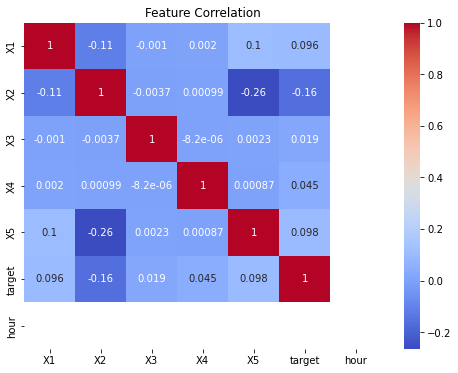

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [34]:
import os
print("📁 Current notebook directory:", os.getcwd())

📁 Current notebook directory: C:\Users\harsh


In [35]:

# Load your submission
submission = pd.read_csv("submission.csv")

# Preview first few rows
print(submission.head())

# Check if it has the right number of predictions
print(f"\nTotal rows: {len(submission)}")

# Check how many 0s and 1s were predicted
print("\nPrediction distribution:")
print(submission["target"].value_counts())

   ID  target
0   0       0
1   1       0
2   2       0
3   3       0
4   4       0

Total rows: 409856

Prediction distribution:
target
0    407871
1      1985
Name: count, dtype: int64


In [36]:
for col in ["X1", "X2", "X3", "X4", "X5"]:
    train[f"{col}_z"] = (train[col] - train[col].mean()) / train[col].std()
    test[f"{col}_z"] = (test[col] - train[col].mean()) / train[col].std()

In [42]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5)
for train_idx, valid_idx in kf.split(X, y):
    ...

In [45]:
submission = pd.DataFrame({
    "ID": test["ID"],             # Use IDs from test set
    "target": test_preds          # Your predictions
})

submission.to_csv("submission.csv", index=False)
print("✅ Fixed submission.csv created with correct shape!")

✅ Fixed submission.csv created with correct shape!
